<a href="https://colab.research.google.com/github/JannatulLima9575/Home-Cleaning-Servises_Analysis_Notebook.ipynb/blob/main/Home_Cleaning_Servises_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## step 2 : Load the Data


In [13]:
df = pd.read_csv('Construction Material Sales.csv')
output = []
output.append("Construction Material Sales\n")
output.append("===================\n")

## step 3: Explore the data

In [14]:
print(df.head())
output.append(f"First few rows:\n{df.head()}\n")

         Date Product Region Customer_Type  Quantity    Price  Discount  \
0  2024-03-24  Cement  South    Individual       162  1394.36      0.26   
1  2024-10-06   Steel  North    Individual       196  4237.69      0.15   
2  2024-09-10  Cement   West    Individual       306  2444.69      0.20   
3  2024-02-04  Cement   East    Individual       115  4434.50      0.25   
4  2024-06-19  Bricks   West    Individual       356  4049.85      0.03   

      Revenue  
0   167155.88  
1   705999.15  
2   598460.11  
3   382475.62  
4  1398494.20  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [20]:
print(df.describe())
output.append(f"Summary statistics:\n{df.describe()}\n")

          Quantity       Price     Discount       Revenue
count  1000.000000  1000.00000  1000.000000  1.000000e+03
mean    249.320000  2480.81908     0.152780  5.194276e+05
std     142.990608  1407.38012     0.087009  4.578993e+05
min       1.000000     9.18000     0.000000  7.359000e+01
25%     120.750000  1272.45500     0.080000  1.439438e+05
50%     251.500000  2554.61500     0.150000  3.805357e+05
75%     370.000000  3671.71000     0.230000  7.781600e+05
max     500.000000  4999.97000     0.300000  2.137500e+06


## step 4: Clean the data

In [24]:
output.append("Data Cleaning Results:\n")

missing_values = df.isnull().sum()

print(missing_values)

output.append(f"Missing Values:\n{missing_values}\n")

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df["Date"])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [26]:
duplicates = df.duplicated().sum()
output.append(f"Numbers of Duplicates Droped: {duplicates}\n")
df.drop_duplicates(inplace=True)

## step 5: Analyze the data

In [28]:
total_revenue = df["Price"].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $2480819.08


In [30]:
total_revenue = df["Revenue"].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $519427610.14


In [33]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append(f'Average Price Per Customer Type:\n')
output.append(f'{average_price_per_service}\n')
print(average_price_per_service)

Customer_Type
Contractor    2481.817243
Individual    2479.759175
Name: Price, dtype: float64


In [35]:
total_sevices_by_region = df['Region'].value_counts()
output.append(f'Total Sevices Customer Provided by Region:\n')
output.append(f'{total_sevices_by_region}\n')
print(total_sevices_by_region)

Region
South    264
North    254
East     249
West     233
Name: count, dtype: int64


In [36]:
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     617052.38
North    599146.47
South    656266.57
West     608353.66
Name: Price, dtype: float64


## step 6: Visualize the data

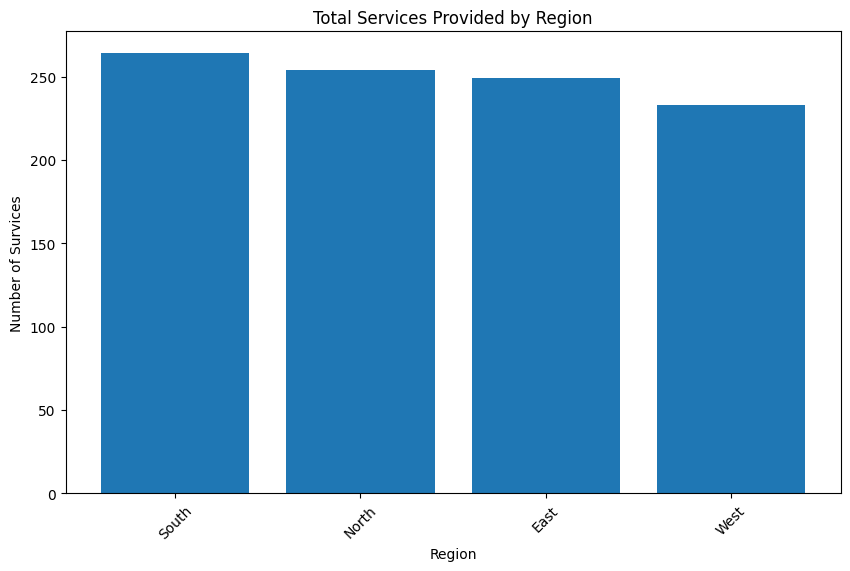

In [39]:
plt.figure(figsize=(10,6))
plt.bar(total_sevices_by_region.index, total_sevices_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Survices')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

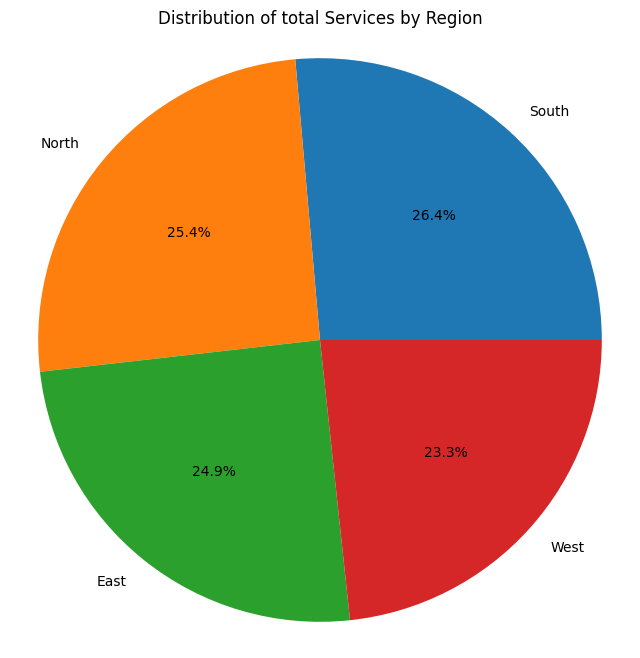

In [42]:
plt.figure(figsize=(8,8))
plt.pie(total_sevices_by_region, label=total_sevices_by_region.values.index, autopct='%1.1f%%')
plt.title('Distribution of total Services by Region')
plt.axis('equal')
plt.savefig('services_distribution_by_region.png')
plt.show()

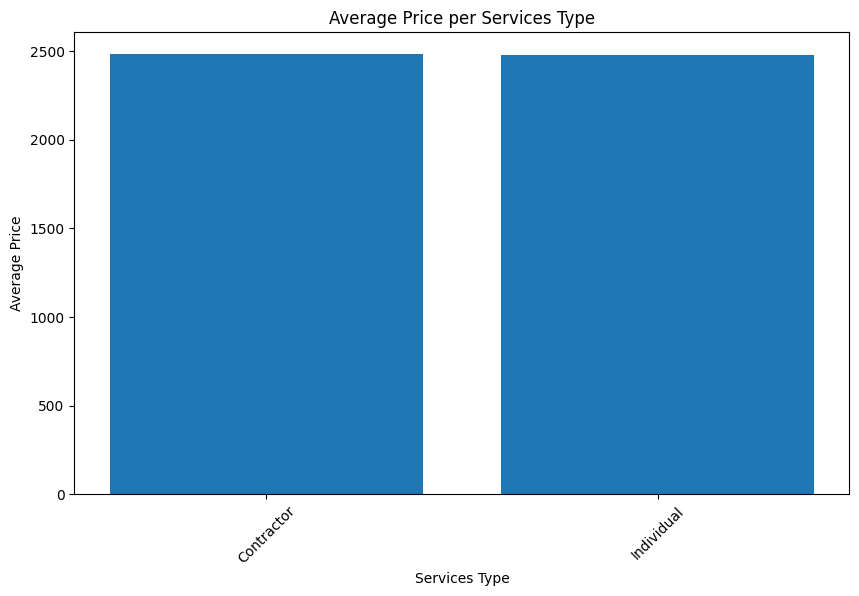

In [52]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Services Type')
plt.xlabel('Services Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

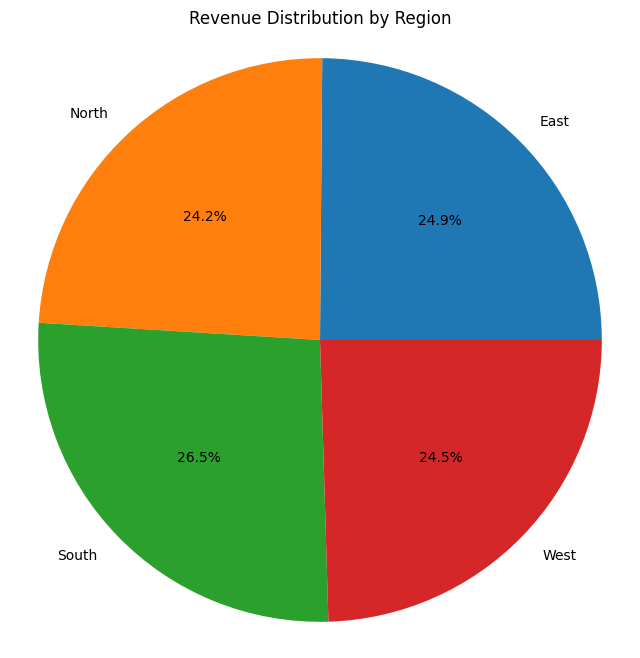

In [56]:
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.savefig('revenue_by_region.png')
plt.show()

In [59]:
with open('analysis_output.txt', 'w') as f:
  f.writelines(output)